### Práctica 2: Regresión Lienal

En este ejemplo práctico en realidad es continuación del anterior puesto que utilizamos el dataset que habíamos preparado. Es más, en el anterior, habíamos tomado decisiones asumiendo que en esta fase trataríamos de modelizar con un modelo de regresión lineal.

El objetivo de esta práctica es entrenar un modelo de regresión lineal, interpretar sus parametros y evaluar la bondad del modelo

#### 1. Entrenamiento del modelo de regresión lineal

En primer lugar vamos a importar las librerías de python que serán necesarias para realizar el análisis.

In [1]:
import pandas as pd # Manipulación de datos y dataFrames
import numpy as np # Funciones matematicas y manipulación de arrays 
from sklearn.model_selection import train_test_split, cross_val_score # Dividir un conjunt de datos en entrenamiento y prubea, realiza validación cruzada para evaluar el rendimiento de un modelo
from sklearn.linear_model import LinearRegression # Importar modelo de regresión lineal
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm # Modelos estadísticos con detalles (coef, p-valores, intervalos)
from sklearn.metrics import mean_squared_error, r2_score, make_scorer # Error cuadrático medio, r2, Permite crear funciones personalizadas de evaluación para usan en modelos de sklearn
from scipy.stats import boxcox, shapiro # Transforma datos para hacerlos mas normales, prueba Shapiro-Wilk
import matplotlib.pyplot as plt # Visualización
import seaborn as sns # Visualización
from sklearn.base import BaseEstimator, RegressorMixin 

In [2]:
pd.set_option('display.max_columns', None) # Para que se muestren todas las columnas
pd.set_option('display.max_rows', None) # Para que se muestren todas las filas

In [3]:
# Cargar el dataset desde el archivo csv
data = pd.read_csv('Datos/vehicles_prep.csv')

Antes de mada vamos a asegurarnos de que todas las variables son numéricas ya que al importar los datos es muy posibles que muchas sean tomadas con otro formato, especialmente las dummy, que las importará como boolean.

In [4]:
# Convertir booleans a numéricos 
boolean_columns = data.select_dtypes(include='bool').columns
data[boolean_columns] = data[boolean_columns].astype(int)

# Asegurar que los datos son numéricos
data = data.apply(pd.to_numeric, errors = 'coerce')

Vamos a separar la variable objetivo <b>price</b> de las variables predictoras. Esto nos dará cierta flexibilidad para luego utilizar ambos conjutnos de forma independiente para hacer validaciones y pruebas.

In [5]:
# Definir la variable objetivo (y) y las predictoras (X)
X = data.drop('price',axis=1) # Variables independientes
y = data['price'] # Variable dependiente o predictora

Ahora vamos a dividir nuestro conjunto de datos en 2 partes: una para entrenamiento (80% de los datos) y otra para la validación o test (20% resntante).

In [6]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

El siguiente paso es <b> *crear el modelo de regresión lineal y entrenarlo* </b> con el *conjunto de entrenamiento* que hemos establecido e interpretar los parámetros devueltos por el modelo entrenado.

In [7]:
# Agregar un término de interpretación manualmente 
X_train = sm.add_constant(X_train) # Agrega una constant (columna de 1) al conjunto de entrenamiento X_train (beta 0), es necesario, pues la libreria statsmodels no incluye la constante en el modelo

# Crear y ajustar el modelo
model = sm.OLS(y_train, X_train).fit() # Aplicamos el modelo de minimos cuadrados ordinarios al conjunto de entrenamiento

# Extraer coeficientes 
coef = model.params

# mostrar el resumen detallado del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     2013.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:38:34   Log-Likelihood:            -3.5903e+05
No. Observations:              324823   AIC:                         7.183e+05
Df Residuals:                  324681   BIC:                         7.199e+05
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

#### 2. Estudio e interpretación de los parametros del modelo de regresión lineal

Los parametros del modelo muestran datos muy inresantes:

Empezamos por <b> *el R^2 y el R^2 ajustado* </b>. Ambos son exactamente 0.466. Es un valor <b>bastante aceptable</b>. El hecho de que sean exactamente iguales es debido a que la cantidad de variables (141, que no son pocas) no son significativas respecto del volumen de registros que tenemos (más de 400.000).

En cuanto al <b> *estadístico de la F* </b>, su valos no nos es fácil de interpretar (2013), pero su probabilidad, es decir,<b> *su p-value, es 0.00 que está por debajo de 0.05* </b>, lo que singifica que al menos uno de los coeficientes de nuestro modelo es significativamente distinto de cero. O lo que es lo mismo, si mi modelo explica lo suficiente acerca de mi variable objetivo como para que sea significativamente mayor que lo que no explica. <b> *Significativo a nivel general* </b>
Al menos con un 5% de significancia.

El <b> *Log-Likelihood* </b> (Verosimilitud), nos nos dice nada.

Luego tenemos los<b> *estadísticos AIC y BIC, ambos cuanto más bajos sean, mejor es nuestro modelo y mejor adaptado a los datos* </b>. Tienen en cuenta la complejidad del modelo, especialmente el BIC. Sirven para comparar modelos, por lo que por si solos tampoco nos dice mucho los valores que han salido. Si hacemos pruebas con otros modelos para los mismos dayos, tendrá sentido comparar estos valores.

A continuación se presentan <b> *los coeficientes de la regresión que ha estimado el modelo* </b>. Hay algunos que tienen un p-valor por enciam de 0.05, por lo que los test de hipotesis individuales de esos coeficientes, indican que no son significativamente distintos de 0. Estos coeficientes hacen referencia a variables que seguramente aportan poco al modelo. Se podría prescindir de ellos ya que se están tomando casi como si fueran 0. Casi todos han salido con valores p por debajo de 0.05 por lo que casi todos son significativos.

Por último, de cara a evaluar los errores o residuos del modelo, tenemos el <b> *coeficiente de Durbon-Watson* </b>, que al ser igual a 2, nos está diciendo que hay independencia entre los errores. Se puede decir que los errores están incorrelados. Esto es una de las premisas que debe cumplir un modelo de regresión lineal.
* DW ≈ 2: No hay autocorrelación (lo ideal).
* DW < 2: Existe autocorrelación positiva.
* DW > 2: Existe autocorrelación negativa.
* DW ≈ 0: Fuerte autocorrelación positiva.
* DW ≈ 4: Fuerte autocorrelación negativa.

<b> *Otra de las premisas que deben cumplir los errores es que su distribución sea lo más cercano a una normal* </b>. En este sentido, los <b> *coeficientes Omnibus y Jarque-Bera* </b>, vienen a arrojarnos luz sobre cómo de normal es nuestra distribución de errores en términos de asimetría y curtosis. Si los p-value de estos coeficientes están por debajo de 0.05, se rechaza la hipotesis nula de que la distribución es normal. En nuestro caso, parece que los coeficientes son 0.00 por lo que podrían presentar curtosis o asimetría importante. Si miramos los <b> *coeficientes de skew y Kurtosis* </b>, que también nos los devuelve el modelo, parece que a nivel de skew, estamos muy cerca del 0 (skew de una normal) pero la curtosis, tiene un valor de 6.4 que es muy superior al valor 3 de la normal. Esto significa que la distribución de errores será muy estrecha y con colas largas.

Vamos a pintarnos la distribución de los errores a ver que pinta tiene:

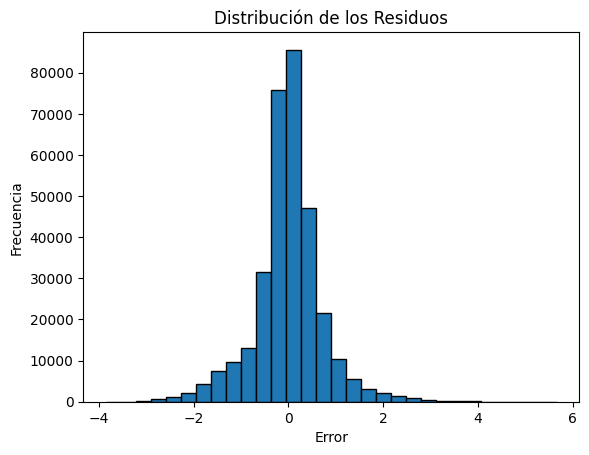

In [8]:
plt.hist(model.resid, bins=30,edgecolor='black') # edgecolor sirve para separar columnas
plt.title('Distribución de los Residuos')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

Se puede ver claramente que tiene un pico muy elevado que aglutina una gran mayoría de los errores mientras que las colas son más ligeras.

El <b> *test de Shapiro-Wilk nos indica si es o no una distribución normal* </b>, no es necesario después de todo lo que hemos visto, pero es otra prueba más.

In [9]:
stat, p_value = shapiro(model.resid) # Aplicamos shapiro sobre los residuos del modelo
print('Shaprio-Wilk Test:')
print('Statistic:',stat)
print('P-value:',p_value)

Shaprio-Wilk Test:
Statistic: 0.9409257973595467
P-value: 9.203607115281201e-121


C:\Users\pauri\AppData\Roaming\Python\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 324823.
  res = hypotest_fun_out(*samples, **kwds)


Efectivamente el test nos indica <b> *al tener un p-value tan bajo,  no es normal nuestra distribución de errrores.* </b>

De esto podemos concluir que los intervalos de confianza en los test de hipotesis de nuestros coeficientes, pueden no ser fiables del todo.
Por extensión, es posible que a la hora de predecir, el modelo no sea todo lo robusto y preciso que debería ser.

Entre la información que devuelve hemos visto los valores R2 y R2 ajustado. Vamos a sacar también el <b> *valor MSE* </b> para tenerlo como referencia:

In [10]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# MSE en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train,y_train_pred)

print(mse_train)

0.5340538283064127


Este valor nos servirá para comparar modelos luego.

#### 3. Validación en conjunto de test

Ahora vamos a ver qué tal generaliza nuestro modelo cuando lo aplicamos a un conjunto que aún no ha visto, es decir, al conjunto de test.
Estimamos los valores de <b>price</b> de ese conjunto y obtenemos también los valores de R2 y MSE en este mismo conjunto para ver cuánto difieren de los del set de entrenamiento.

In [11]:
# Agregar un término de intercepción manualmente
X_test = sm.add_constant(X_test) # Agrega una columna de 1s

# Hacer predicciones con los datos de prueba
y_test_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test,y_test_pred)
r2 = r2_score(y_test,y_test_pred)

print(f'Error cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R2): {r2}')

Error cuadrático Medio (MSE): 0.5302739941570802
Coeficiente de Determinación (R2): 0.4679806426726457


A la vista del resultado, <b> *los valores son prácticamante los mismos que los ressultados del test de entrenamiento. Pinta bien.* </b>

Ahora vamos a realizar una <b> *validación cruzada* </b> de forma que entrenemos nuestro modelo en distintas muestras de nuestros datos y los validemos en conjuntos a parte. Esta validación devolverá resultados más robustos para establecer nuestras conclusiones sobre el modelo. 
Es decir, si todos los modelos entrenados con distintas partes de nuestros datos, tienen las mismas métricas, podemos coger el modelo genera a partir de todo el conjunto y estar seeguros de que cuando vengan datos nuebos, generalizará bien.

Aplicamos un algoritmo de cross validation con 10 folds y tomamos para valorar tanto el R2 como el MSE. Dado que hemos statsmodel.OLS para generar el modelo y éste no tiene un método fit(), debemos "envolver" nuestro modelo en una clase que utilizaremos para simular este método y seguir usando nuestro modelo.

In [12]:
# Definir un envolotrio para el modelo de statsmodel
class StatsmodelOLS(BaseEstimator, RegressorMixin): # Creamos una clase llamada StatsmodelOLS que hereda de BaseEstimator y RegressorMixin
    def __init__(self): 
        self.model = None # Se inicializa la clase con un atributo model que más adelante almacenará el modelo OLS ajustado

    def fit(self, X, y):
        X = sm.add_constant(X) # Agrega la constante a X
        self.model = sm.OLS(y,X).fit() # Ajuta el modelo de regresión OLS y lo guarda en self.model
        return self # Devuelve self para mantener compatibilidad con sickit-learn
    
    def predict(self, X):
        X = sm.add_constant(X)  # Agregar la constante (intercepto)
        return self.model.predict(X) # Usa el modelo ajustado para hacer predicciones sobre X

# Crear el modelo envuelto
model = StatsmodelOLS() # Se crea una instancia del modelo, que luego puede ser entrenado con .fit(X,y) y usada para hacer predicciones con .predict()


Ahora podemos aplicar la validación cruzada de 10 folds y pedirle en primera instancia información sobre el <b>R2</b> en cada validación 

In [13]:
folds = 10
# Realizar validación cruzada con R^2
scores_r2 = cross_val_score(model, X, y, cv=folds, scoring='r2')

# Estadística de los R^2
print("R^2 promedio:", scores_r2.mean())
print("R^2 std:", scores_r2.std())
print("R^2 por fold:", scores_r2)

R^2 promedio: 0.38279477306068166
R^2 std: 0.06911172445438243
R^2 por fold: [0.42256205 0.41488813 0.36999067 0.41073197 0.36871667 0.42561022
 0.40027204 0.19014347 0.45118398 0.37384854]


Volvemos a hacer la validación cruzada con 10 folds pero para la <b>métrica MSE.</b>

In [14]:
# Validación cruzada con mse como métrica
scores_mse = cross_val_score(model, X, y, cv=folds, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# Estadisticas de a mse 
print('mse promedio:', scores_mse.mean())
print('mse std:', scores_mse.std())
print('mse por fold:', scores_mse)


mse promedio: -0.6154514052783133
mse std: 0.11556037772737156
mse por fold: [-0.62484137 -0.52142108 -0.59715504 -0.60039391 -0.50969059 -0.57352956
 -0.51944363 -0.8795322  -0.54723102 -0.78127565]


Vamos a pintarnos ambas distribuciones de cada métrica para ver qué pinta tienen:

In [15]:
# Covnertir las métricas en DataFrame para visualización
metrics_df1 = pd.DataFrame({'Fold' : np.arange(1,folds+1),
                            'MSE': scores_mse,
                            'R²': scores_r2,
                            'Modelo':'Original'}) 

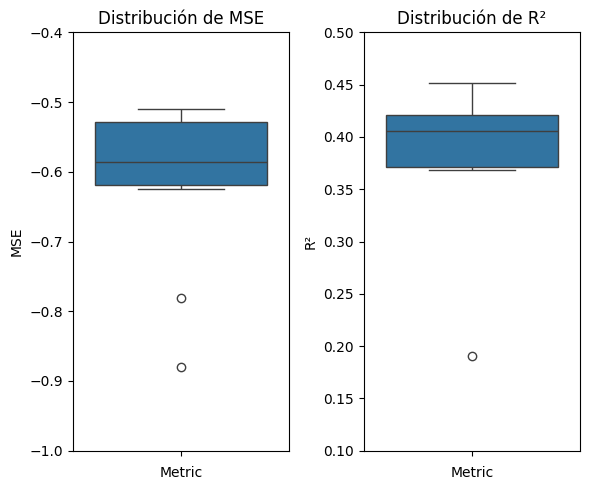

In [16]:
# Boxplots para las métricas 
plt.figure(figsize=(6,5))

# MSE 
plt.subplot(1,2,1,)
sns.boxplot(data=metrics_df1, y='MSE')
plt.title('Distribución de MSE')
plt.xlabel('Metric')
plt.ylabel('MSE')
plt.ylim(-1, -0.4)


# R²
plt.subplot(1,2,2)
sns.boxplot(data=metrics_df1, y='R²')
plt.title('Distribución de R²')
plt.xlabel('Metric')
plt.ylabel('R²')
plt.ylim(0.1, 0.5)

plt.tight_layout()
plt.show()

En vista de los valores devueltos, parece que <b> *no hay excesiva dispersión entre ellos* </b>, por lo podríamos concluir que generaliza bien. Es cierto que en algún fold se sube un 50% el MSE y baja mucho el R2. Habría que trabajar un poco sobre esto para conseguir una distribución más consistente.

#### 4. Estimación de la importancia relativa de las variables

Ahora vamos a analizar la importancia de cada variable respecto del total de todas ellas. Esto nos va a dar una especie de ranking en el que vamos a poder ver de forma ordenada cuales son las variables que mayor relevancia tienen para el modelo. Nos ayudará a hacer selección de variables enter otras cosas. <b> *Nos calcula aquellas variables más importantes para el modelo de regresión lineal.* </b>

In [17]:
# Definimos función importancia relatvia 
def relativeImp(data, outcomeName, driverNames):
   # Paso 1: Dividir en X e y
   X = data[driverNames]
   y = data[outcomeName]

   # Paso 2: Ajustar modelo OLS con constante
   X_sm = sm.add_constant(X)
   model = sm.OLS(y,X_sm).fit()

   # Paso 3: Obtener coeficientes del modelo (excluyendo la constante)
   coef = model.params.drop('const')

   # Paso 4: Calcular las covarianzas entre cada X e Y
   covariances = data[coef.index].apply(lambda x: np.cov(x, y, bias=True)[0, 1])

   # Paso 5: Importancia relativa cruda 
   rawRelaImpt = coef * covariances

   # Paso 6: Normalizar a porcentaje 
   normRelaImpt = 100* rawRelaImpt.abs() / rawRelaImpt.abs().sum()
   
   # Paso 7: Crear Dataframe de salida 
   df = pd.DataFrame({
        'driver': rawRelaImpt.index,
        'rawRelaImpt': rawRelaImpt.values,
        'normRelaImpt': normRelaImpt.values,
        'Coeficientes': coef.values }).sort_values(by='normRelaImpt', ascending=False)
   
   return df.reset_index(drop=True) 


In [18]:
# Calculamos importancia relativa
df_relativeImp = relativeImp(X.join(y), outcomeName = 'price', driverNames = X.columns.to_list())

pd.set_option('display.max_rows', None) # Visualizar todas las filas con todas las variables

# Ordenamos valores 
df_relativeImp=df_relativeImp.sort_values(by='normRelaImpt', ascending=False)

# Añadimos los coeficientes del modelo de regresión lineal de cada variable 
df_relativeImp['Coeficientes'] = df_relativeImp['driver'].map(coef)
df_relativeImp.head(10)


,driver,rawRelaImpt,normRelaImpt,Coeficientes
0,odometer,0.151159,25.100512,-0.332615
1,year,0.085914,14.266347,0.227867
2,fuel_gas,0.076495,12.702366,-0.804436
3,cylinders_4 cylinders,0.042361,7.034252,-0.338636
4,fuel_other,-0.028058,4.659130,-0.698272
5,type_pickup,0.026331,4.372429,0.372573
6,transmission_other,0.025155,4.177136,0.233280
7,drive_fwd,0.020232,3.359559,-0.162422
8,type_sedan,0.013706,2.275944,-0.131004
9,manufacturer_nissan,0.006549,1.087462,-0.375526


A la vista del listado, se ve claramente que las varibales numéricas son las que más aportan al modelo y depués algunas de las que teníamos ubicadas como que iban a ser relevantes. Los coeficientes nos muestran como por ejemplo con la variable <b>odometer</b> hay una relació inversa y muy fuerte. Se trata de un coeficiente con valor -1.47 que al ser nevativo, nos indica esta relación inversa. A mayor kilometraje, menor precio. con <b>year</b> sin embargo la relación es directa y así lo muestra el coeficiente. Al ser positivo, cuanto más antiguo sea el coche menor será el precio.

Otras variables relevantes como por ejemplo <b>fuel_gas</b> también presenta una relación inversa. Esto es porque esta variable es 1 cuando el vehículo es de gasolina y 0 cuando es de otro tipo de combustible (electrico, diesel,etc.). Es decir que cuanto esta variable aumenta al pasar de 0 a 1, el precio disminuye ya que en general los de gasolina tienen menor precio según los boxplots del análisis exploratorio. Se pueden extraer muchas conclusiones de todos estos coeficientes.

Y si lo ponemos en un gráfico de barras...

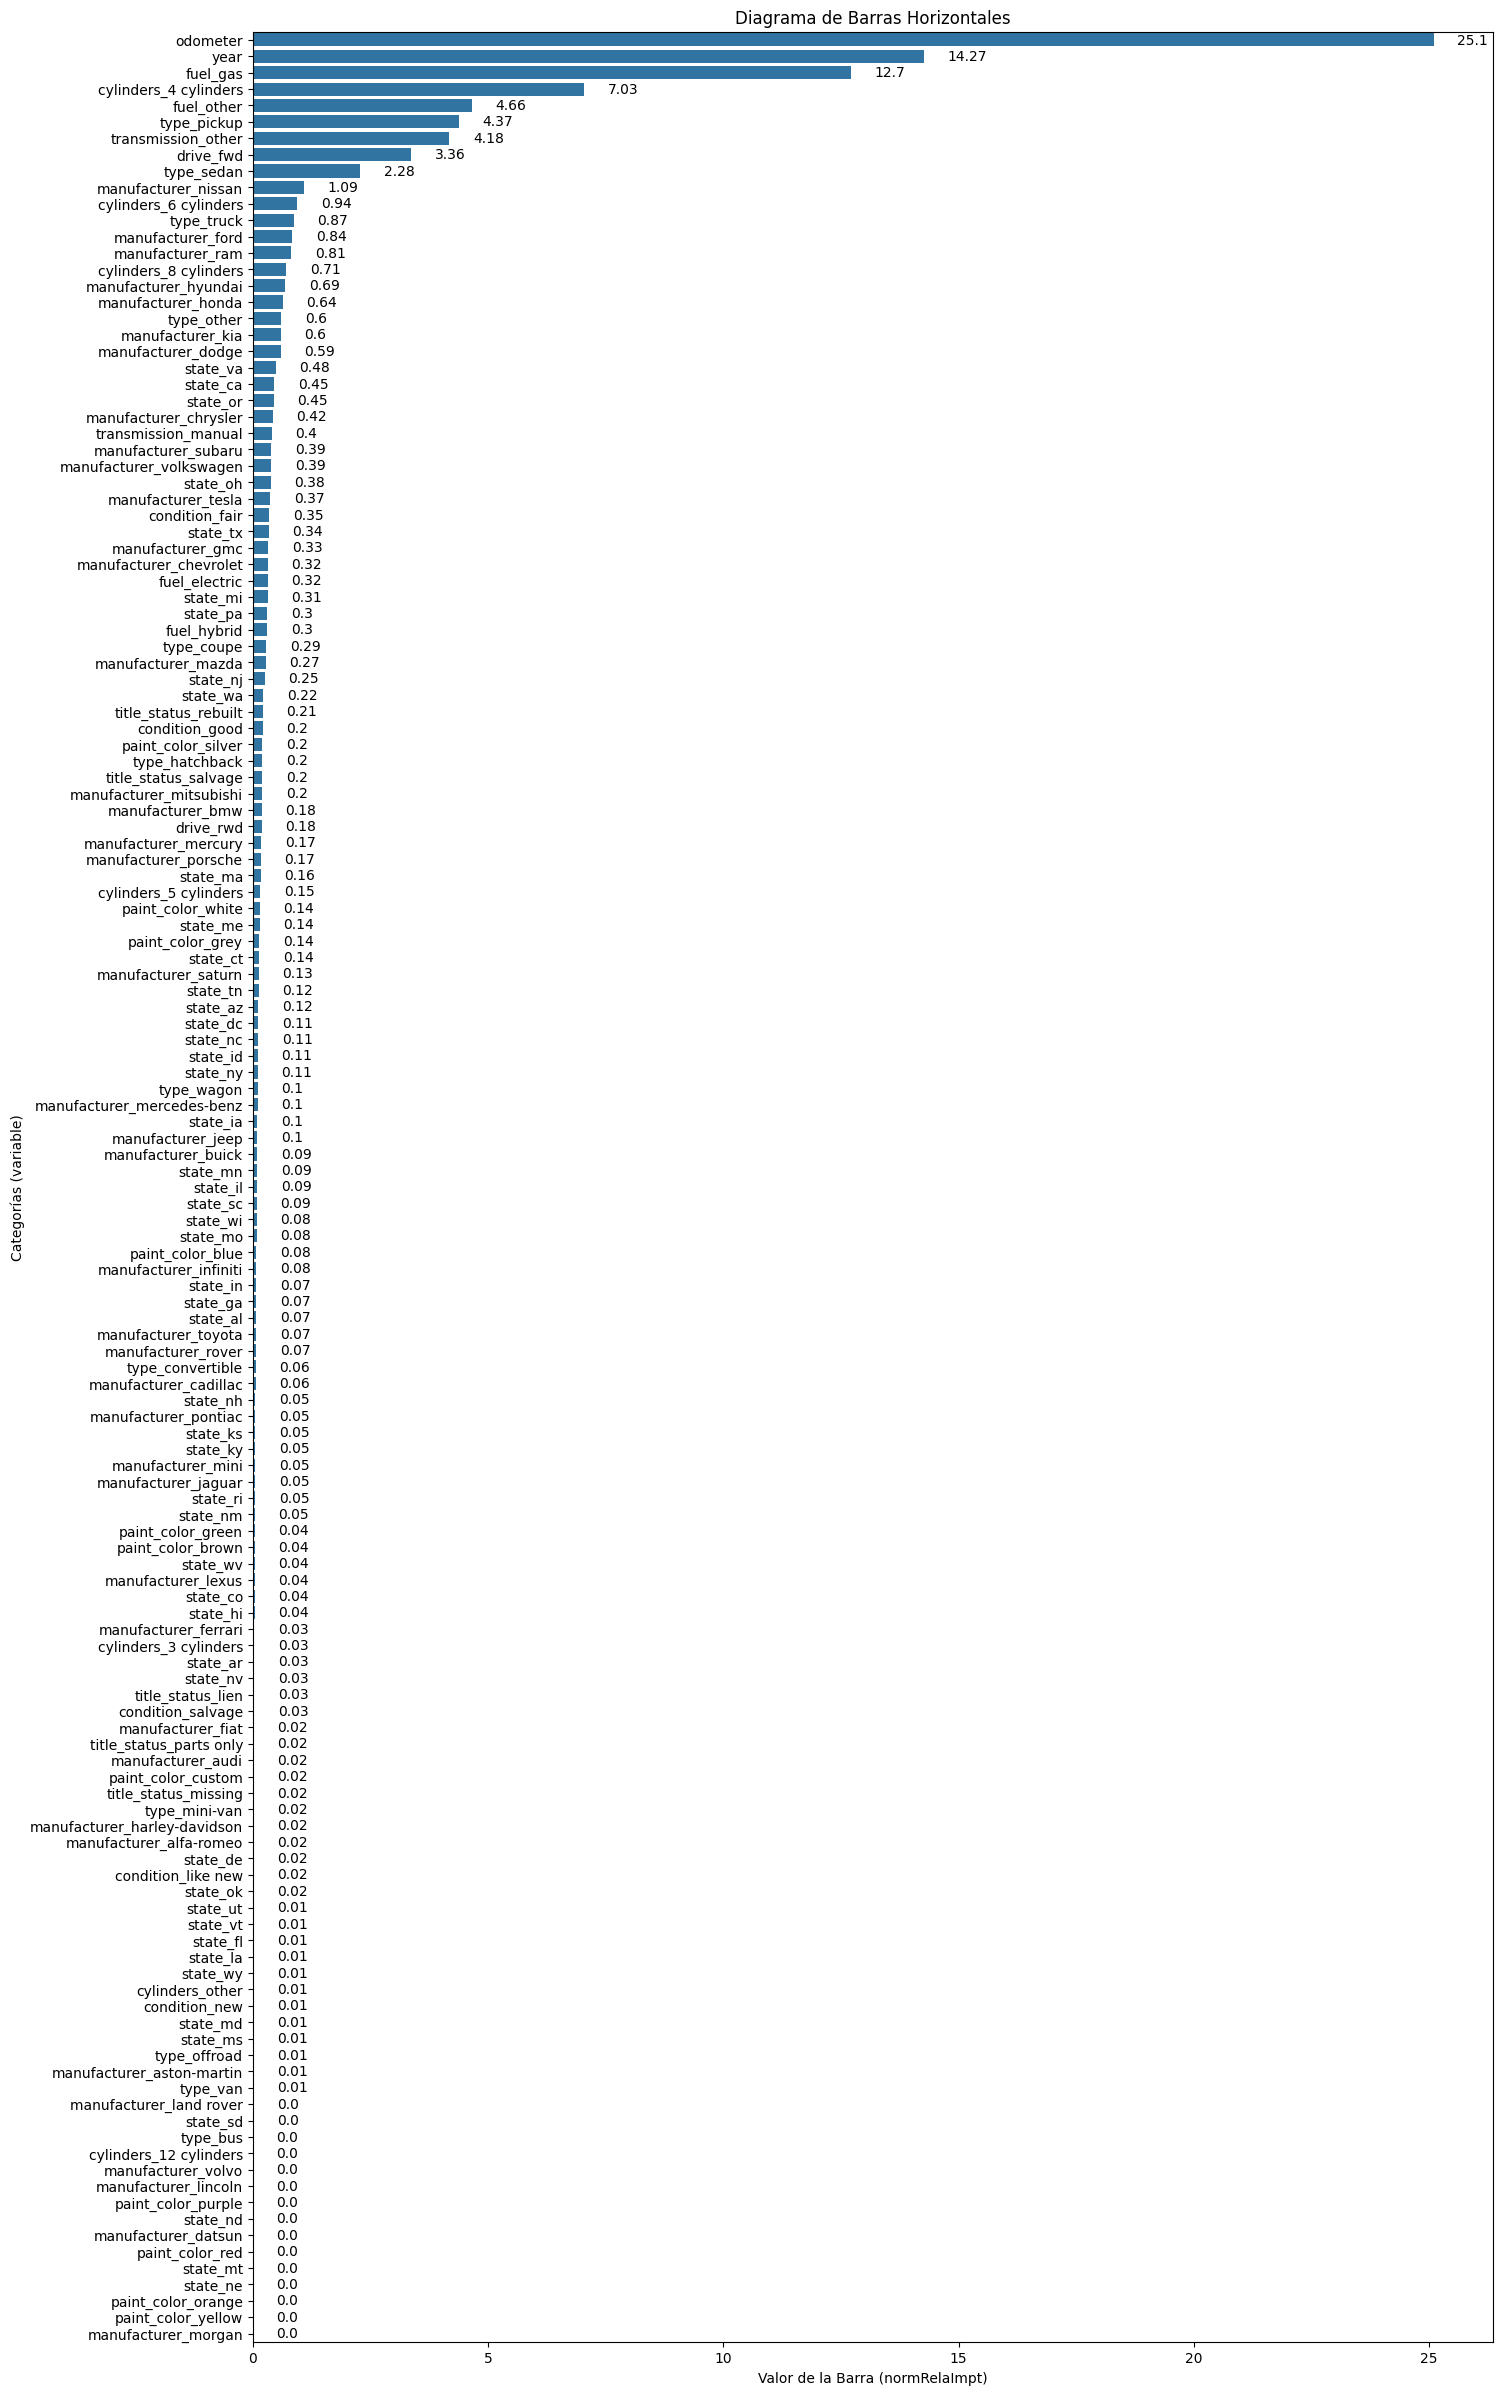

In [19]:
# Crear el diagrama de barras horizontales 
plt.figure(figsize = (16,30))
ax = sns.barplot(x = 'normRelaImpt', y ='driver', data=df_relativeImp, orient='h')

# Añadir los valores a la derecha a las barras
for index, value in enumerate(df_relativeImp['normRelaImpt']):
    ax.text(value + 0.5, index, f'{round(value,2)}', va='center', ha='left')

# Etiqueta y título 
plt.xlabel('Valor de la Barra (normRelaImpt)')
plt.ylabel('Categorías (variable)')
plt.title('Diagrama de Barras Horizontales')

# Mostrar la gráfico
plt.show()

#### 5. Transformación de los datos para mejorar el modelo

Dada la importancia de las variables <b>odomneter</b> y <b>year</b> vamos a probar a aplicarles una transformación a ver si con ello conseguimos mejorar algun parámetro de nuestro modelo.

Empezamos con la variable <b>odometer</b>. Vamos a aplicarle una transformación de tipo BoxCox <b> *(tratamos de linealizar un poco más la variable con nuestra variable objetivo, es posible también aplicar un logaritmo)* </b> tratando de linealizar un poco su comportamiento para ver si aumenta su relación con la variable <b>price</b>. Esto lo medimos a través de la matriz de correlación.

In [ ]:
print(f'Factor de correlación entre price y odometer antes de transformar ; {data['price'].corr(data['odometer'])}')

# Transformación de odometer mediante BoxCox
data['odometer'], _ = boxcox(data['odometer'] + abs(data['odometer'].min())+1) # Se pone ,_ detrás de data['odometer'] pork la función boxcox lo requiere

print(f'Factor de correlación entre price y odometer después de transformar: {data['price'].corr(data['odometer'])}')

Factor de correlación entre price y odometer antes de transformar ; -0.45512254278127523
Factor de correlación entre price y odometer después de transformar: -0.47387646871007394


El factor de correlación ha aumentado tras haber transformado la variable por lo que vamos a mantener esta transformación y la incluimos en el modelo a ver que tal le sienta.

Ahora hacemos lo mismo con <b>year</b> a ver si esta transformación le sienta bien:

In [21]:
print(f'Factor de correlación entre price y odometer antes de transformar ; {data['price'].corr(data['year'])}')

# Transformación de odometer mediante BoxCox
data['year'], _ = boxcox(data['year'] + abs(data['year'].min())+1)

print(f'Factor de correlación entre price y odometer después de transformar: {data['price'].corr(data['year'])}')

Factor de correlación entre price y odometer antes de transformar ; 0.37584518256867944
Factor de correlación entre price y odometer después de transformar: 0.4939403974341185


En este caso la correlación ha subido mucho por lo que la incluimos también. 

Volvemos a modelar los datos, esta vez con las 2 variables transformadas

In [22]:
# Redefinir la variable objetivo (y) y las predictoras (X) incluyedno las transformadas
X = data.drop('price',axis=1)
y = data['price']

# Dividir los datos en entrenamiento (80%) y prueb (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar un término de intercepción manualmente
X_train = sm.add_constant(X_train) 

# Crear y ajustar el modelo 
model = sm.OLS(y_train, X_train).fit()

# Extraer los coeficientes 
coef = model.params

# Mostarr el resumen detallado del modelo
print(model.summary())

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# MSE en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)

print(f'mse: {mse_train}')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     2271.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:41:16   Log-Likelihood:            -3.4958e+05
No. Observations:              324823   AIC:                         6.994e+05
Df Residuals:                  324681   BIC:                         7.010e+05
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

A la vista de los resultados del modelo, el R2 ha subido a 0.5 practicamente y también ha bajado ligeramente el MSE, por lo que en esos términos, nuestro modelo ha mejorado. Si evaluamos el resto de métricas devueltas el AIX y el BIC también se ha reducido ligeramente, cosa que tambíen es buena.

<b> *Sin embargo, los residuos siguen presentando el mismo problema con la curtosis, es demasiado elevada y por tanto saca la distribución de la normalidad.* </b> 

Vamos a aplicar la validación cruzada para ver como se comportan las métricas ya en conjuntos de validación y ver si generalizan bien los modelos para el conjunt nuevo que tenemos.

In [23]:
# Crear el modeo envuelto
model = StatsmodelOLS()

folds = 10
# Realizar validación cruzada con R^2
scores_r2 = cross_val_score(model, X, y, cv=folds, scoring='r2')

# Estadísticas de los R^2 
print("R^2 promedio:", scores_r2.mean())
print("R^2 std:", scores_r2.std())
print("R^2 por fold:", scores_r2)

R^2 promedio: 0.42265160251223444
R^2 std: 0.07287347840049141
R^2 por fold: [0.44828416 0.44354884 0.42272548 0.45668071 0.42169017 0.45929656
 0.451734   0.2152794  0.49688519 0.41039151]


In [24]:
# Crear el modelo envuelto
model = StatsmodelOLS()

# Validación cruzada con mse como métrica
scores_mse = cross_val_score(model, X, y, cv=folds, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# Estadisticas de los mse
print("mse promedio:", scores_mse.mean())
print("mse std:", scores_mse.std())
print("mse por fold:", scores_mse)

mse promedio: -0.5764895531294363
mse std: 0.11787702375614122
mse por fold: [-0.59700765 -0.49588016 -0.54717029 -0.55357762 -0.46692042 -0.53989366
 -0.47487078 -0.85223371 -0.50166179 -0.73567945]


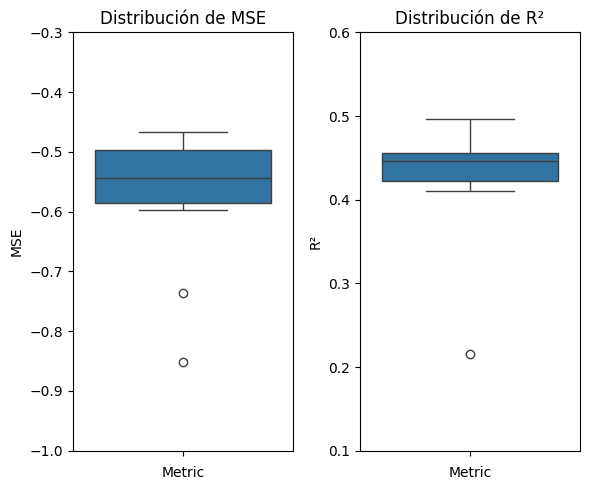

In [25]:
# Convertir las métricas en DataFrame para visualización
metrics_df2 = pd.DataFrame({
    "Fold": np.arange(1, folds+1),
    "MSE": scores_mse,
    "R²": scores_r2,
    "Modelo": "Transformado"
})

# Boxplots para las métricas
plt.figure(figsize=(6, 5))

# MSE
plt.subplot(1, 2, 1)
sns.boxplot(data=metrics_df2, y="MSE")
plt.title("Distribución de MSE")
plt.ylabel("MSE")
plt.xlabel("Metric")
plt.ylim(-1, -0.3)

# R²
plt.subplot(1, 2, 2)
sns.boxplot(data=metrics_df2, y="R²")
plt.title("Distribución de R²")
plt.ylabel("R²")
plt.xlabel("Metric")
plt.ylim(0.1, 0.6)

plt.tight_layout()
plt.show()

Los resultados de validación para ambas métricas muestran mejoría respecto a la validación que hicimos con el dataset sin transformar. <b> *Esto se ve claramente en que la distribución de valores R2 se encuentra más arriba que antes e incluso un poco menos dispersa, y la distribución de MSE está mucho menos dispersa y un poco más baja que la otra.* </b>

Seguimos teniendo un fold en el que los ratios empeoran mucho, quizá debido a algún conjunto de valores atípicos que no hemos tenido en cuenta en nuestro analisis exploratorio y quizá convendría volver sobre ello y entender bien qué esta ocurriendo ahí.

#### 6. Eliminación de variables poco relevantes para mejorar el modelo

Vamos a realizar una última iteración para tratar de analizar qué ocurre si quitamos todas las variables <b>state</b>. La idea es que, según la importancia relativa de las variables, las de <b>state</b> tienen nula o casi nula en practicamente todas sus variables. Vamos a ver si al quitarlas, vemos algún cambio o mejora en nuestro modelo.

In [26]:
# Definir la variable objetivo (y) y las predictoras (X)
X = data.drop('price',axis=1)
y = data['price']

# Crear una lista de columnas a conservar
columns_to_keep = [col for col in X.columns if not col.startswith(('state'))]

# Filtrar el DataFrame
X = X[columns_to_keep]

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar un término de intercepción manualmente
X_train = sm.add_constant(X_train)  # Agrega una columna de 1s para el intercepto

# Crear y ajustar el modelo
model = sm.OLS(y_train, X_train).fit()

# Extraer los coeficientes
coef = model.params

# Mostrar el resumen detallado del modelo
print(model.summary())

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# MSE en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"mse: {mse_train}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     3403.
Date:                Wed, 11 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:43:41   Log-Likelihood:            -3.5227e+05
No. Observations:              324823   AIC:                         7.047e+05
Df Residuals:                  324731   BIC:                         7.057e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [27]:
# Crear el modelo envuelto
model = StatsmodelOLS()

folds = 10
# Realizar validación cruzada con R^2
scores_r2 = cross_val_score(model, X, y, cv=folds, scoring='r2')

# Estadísticas de los R^2
print("R^2 promedio:", scores_r2.mean())
print("R^2 std:", scores_r2.std())
print("R^2 por fold:", scores_r2)

R^2 promedio: 0.48120238208433286
R^2 std: 0.06990721543968494
R^2 por fold: [0.44627438 0.45173336 0.51493228 0.51102402 0.54875441 0.50066814
 0.53988117 0.29772998 0.53182951 0.46919656]


In [28]:
# Crear el modelo envuelto
model = StatsmodelOLS()

# Validación cruzada con mse como métrica
scores_mse = cross_val_score(model, X, y, cv=folds, scoring=make_scorer(mean_squared_error, greater_is_better=False))

# Estadisticas de los mse
print("mse promedio:", scores_mse.mean())
print("mse std:", scores_mse.std())
print("mse por fold:", scores_mse)

mse promedio: -0.5199001020550021
mse std: 0.11523216572771464
mse por fold: [-0.59918243 -0.48858654 -0.45977197 -0.49820826 -0.36433027 -0.49858404
 -0.39852368 -0.76268953 -0.46681839 -0.6623059 ]


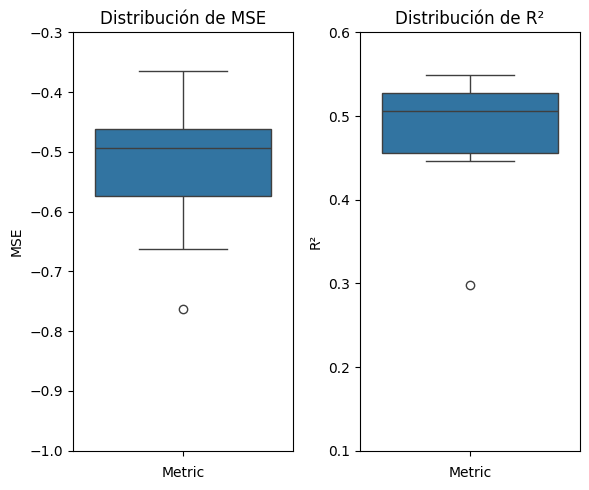

In [29]:
# Convertir las métricas en DataFrame para visualización
metrics_df3 = pd.DataFrame({
    "Fold": np.arange(1, folds+1),
    "MSE": scores_mse,
    "R²": scores_r2,
    "Modelo": "Transf_sin State"
})

# Boxplots para las métricas
plt.figure(figsize=(6, 5))

# MSE
plt.subplot(1, 2, 1)
sns.boxplot(data=metrics_df3, y="MSE")
plt.title("Distribución de MSE")
plt.ylabel("MSE")
plt.xlabel("Metric")
plt.ylim(-1, -0.3)

# R²
plt.subplot(1, 2, 2)
sns.boxplot(data=metrics_df3, y="R²")
plt.title("Distribución de R²")
plt.ylabel("R²")
plt.xlabel("Metric")
plt.ylim(0.1, 0.6)

plt.tight_layout()
plt.show()

Tras analizar este último cambio, ponemos los 3 modelos sobre la mesa y valoramos cual consideramos mejor en términos de estas 2 métricas con las que estamos trabajando:

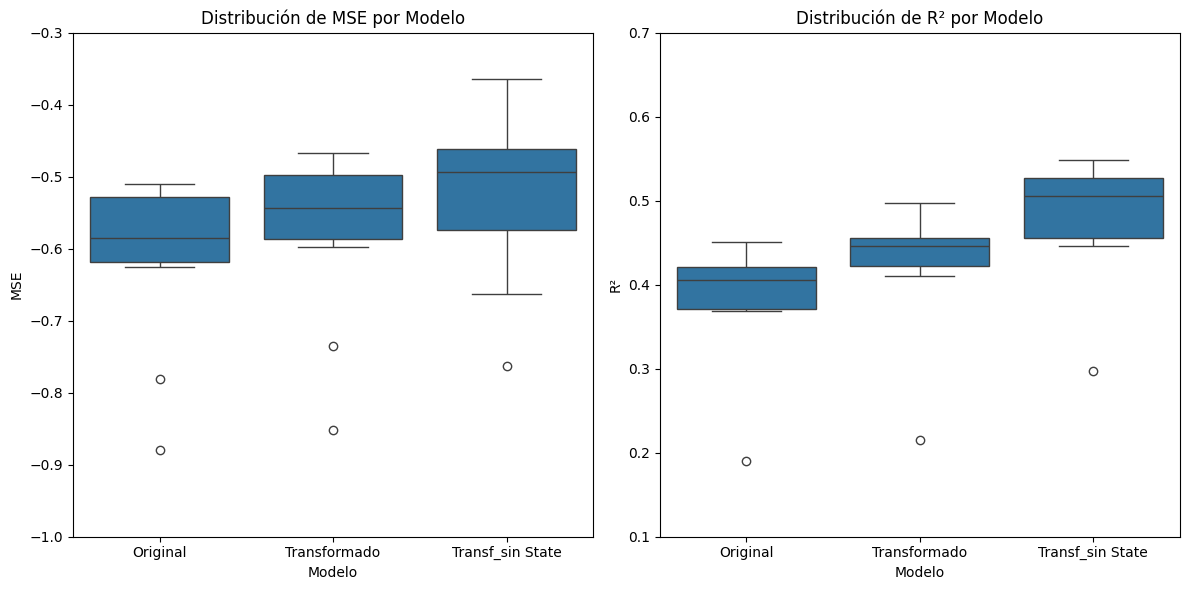

In [30]:
# Concatenar los DataFrames
all_metrics_df = pd.concat([metrics_df1, metrics_df2, metrics_df3], ignore_index=True)

# Boxplots para las métricas por modelo
plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 2, 1)
sns.boxplot(data=all_metrics_df, x="Modelo", y="MSE")
plt.title("Distribución de MSE por Modelo")
plt.ylabel("MSE")
plt.xlabel("Modelo")
plt.ylim(-1, -0.3)

# R²
plt.subplot(1, 2, 2)
sns.boxplot(data=all_metrics_df, x="Modelo", y="R²")
plt.title("Distribución de R² por Modelo")
plt.ylabel("R²")
plt.xlabel("Modelo")
plt.ylim(0.1, 0.7)

plt.tight_layout()
plt.show()

Claramente, el modelo ha ido mejorando las métricas con los cambios que hemos ido aplicando. Empezamos con un modelo con un R2 en torno a 0.4 y acabamos en trono a 0.5. El MSE también ha ido mejorando, puesto que empezamos con un valor mediano cercano a -0.6 y hemos terminado por debajo del -0.5. Es cierto, que en ambas métricas, parece que el modelo generaliza un poco peor el haber más dispersión en el último respecto del primero o segundo.